In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Equities","Foreign'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]
symbols += ['VT']

In [2]:
quote = Quote(symbols, 60)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-05-02 to 2019-07-01 - 76'

In [5]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 6) & (stat['21-shrp'] > 0.6)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
RSX,21,8.034714,2.674957,2.941373,4.174395
EWL,21,4.760950,1.662047,2.764232,3.113807
EWA,21,3.759874,1.496320,2.401363,2.656897
EFAV,21,2.722518,1.407748,1.815561,2.819624
VIGI,21,3.252784,2.449498,1.259898,4.587566
EFG,21,2.481375,2.744365,0.843440,4.537548
RODM,21,1.752923,1.938339,0.818359,3.686791
EPP,21,2.409384,2.890335,0.775937,4.599415
FEZ,21,2.442479,3.192286,0.712910,5.593129


In [6]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['RSX'] -1.1064937226883873 0.8 0.8348790731205472 2.941372795808934
['RSX', 'EWL'] -1.2720370898180873 0.851945347287185 0.7288201930165426 2.852802630121815


['RSX', 'EWL']

In [7]:
quote.setup_mask(['RSX', 'EWL'])
quote.find_optimal_ratio(21)

({'RSX': 0.59, 'EWL': 0.41}, 6.6765, 2.1827, 2.9825)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,21.0,6.694892,2.189984,1.692830,5.904527,7.228540,7.996263,9.182945,2.980946,3.740816
RSX,21.0,8.034714,2.674957,2.272726,7.652342,8.894002,9.759555,11.407202,2.941373,4.174395
EWL,21.0,4.760950,1.662047,0.854228,4.340222,5.445814,6.179888,6.313994,2.764232,3.113807


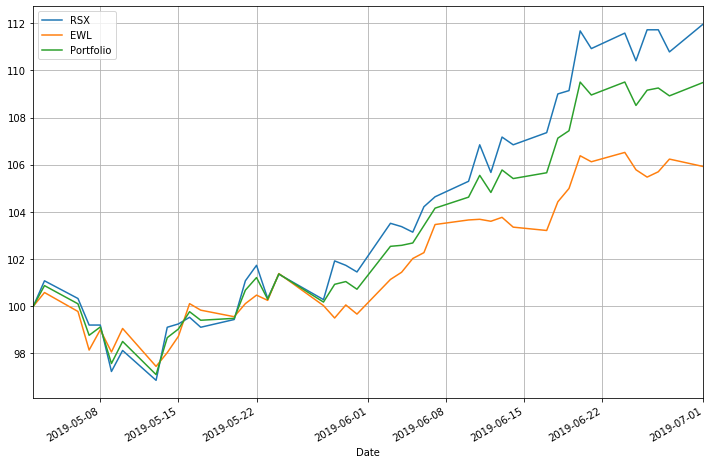

In [8]:
%pylab inline
quote.setup_mask(['RSX', 'EWL'])
quote.graph(21, {'RSX': 0.59, 'EWL': 0.41})